In [72]:
# importing libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import Dis_Stats as ds
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [73]:
# loading the dataset

df = pd.read_csv(r'D:\Excelr\Data_Science _Course\Code\DATASET\gender_classification_v7.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [74]:
# to check the overview of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [75]:
# to get the basic stats of the dataset

df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [76]:
# to change the type of gender data into int using label encoding

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [77]:
df['gender']

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


In [79]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [80]:
# to check there is any null value

df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [81]:
# to get the advanced stats of the dataset

for i in df.columns:
    print('||',i,'||')
    ds.calc_fo(df[i])
    print('='*50)

|| long_hair ||
Total Revenue 4349
Total Count 5001
Mean 0.869626074785043
Median 1.0
Mode 1
Minimum 0
Maximum 1
Range 1
Variance 0.11337656483900181
Standard Deviation 0.3367143668437713
Quartile 1 1.0
Quartile 3 1.0
Inter Quartile Range 0.0
Lower Whisker 1.0
Upper Whisker 1.0
-2.1954873993038855
2.8201649205021377
|| forehead_width_cm ||
Total Revenue 65920.6
Total Count 5001
Mean 13.18148370325935
Median 13.1
Mode 12.0
Minimum 11.4
Maximum 15.5
Range 4.1
Variance 1.2254879805882455
Standard Deviation 1.1070176062684123
Quartile 1 12.2
Quartile 3 14.0
Inter Quartile Range 1.8000000000000007
Lower Whisker 9.499999999999998
Upper Whisker 16.700000000000003
0.24216884127602942
-0.930865697789264
|| forehead_height_cm ||
Total Revenue 29737.5
Total Count 5001
Mean 5.946310737852429
Median 5.9
Mode 5.7
Minimum 5.1
Maximum 7.1
Range 2.0
Variance 0.29291230416184305
Standard Deviation 0.5412137324217143
Quartile 1 5.5
Quartile 3 6.4
Inter Quartile Range 0.9000000000000004
Lower Whisker 4.14

long_hair


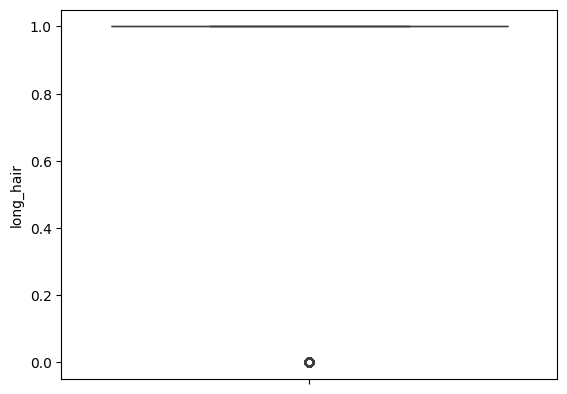

forehead_width_cm


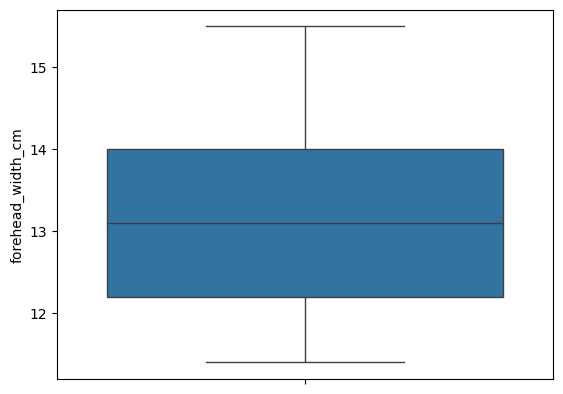

forehead_height_cm


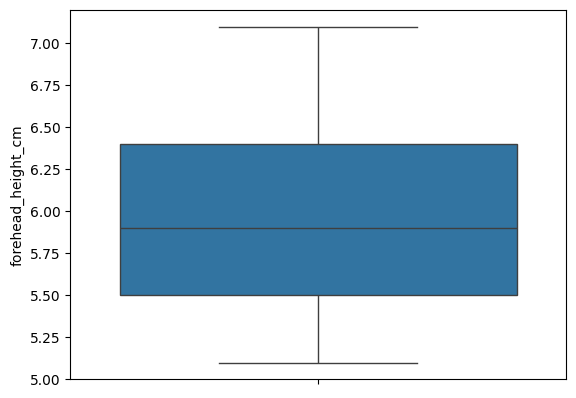

nose_wide


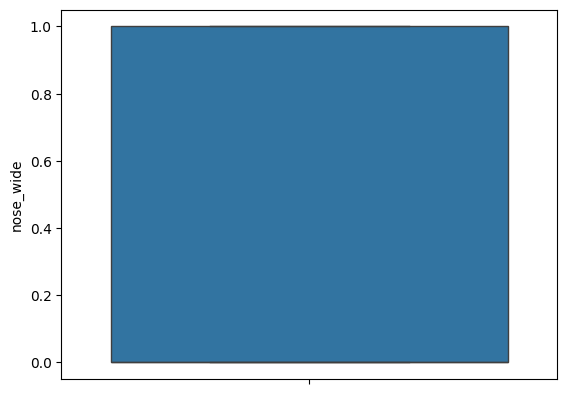

nose_long


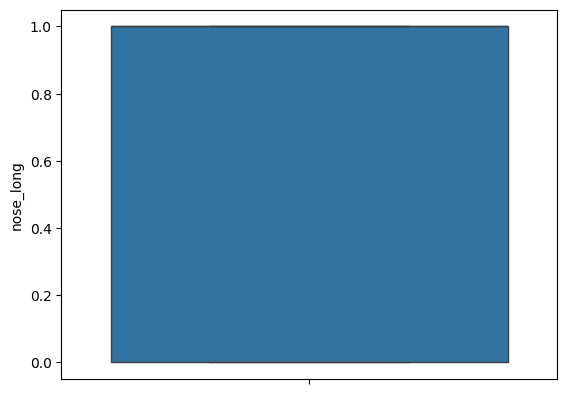

lips_thin


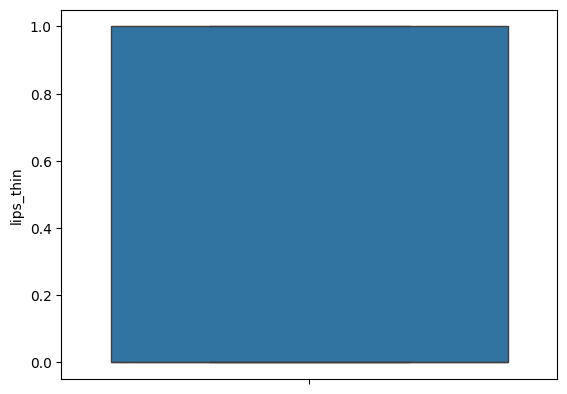

distance_nose_to_lip_long


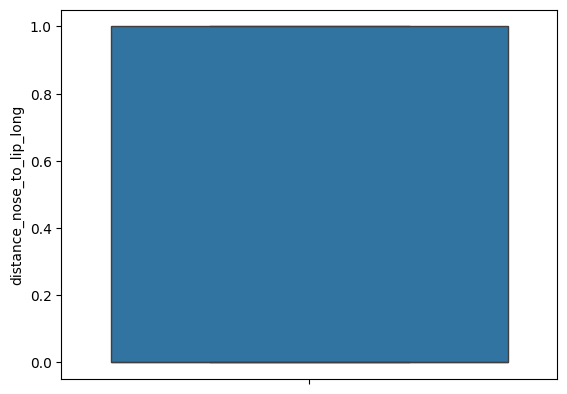

gender


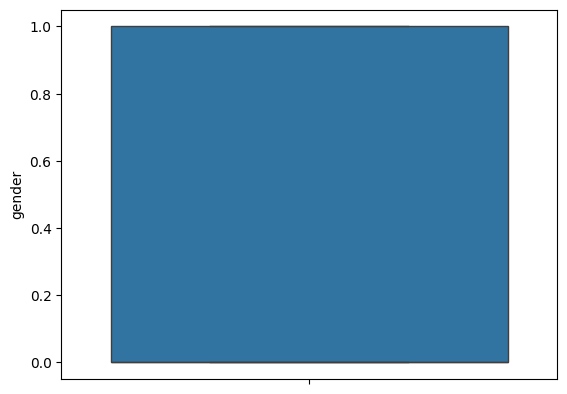

In [82]:
# to create box plot to check for outliers

for i in df.columns:
    print(i)
    sns.boxplot(df[i])
    plt.show()

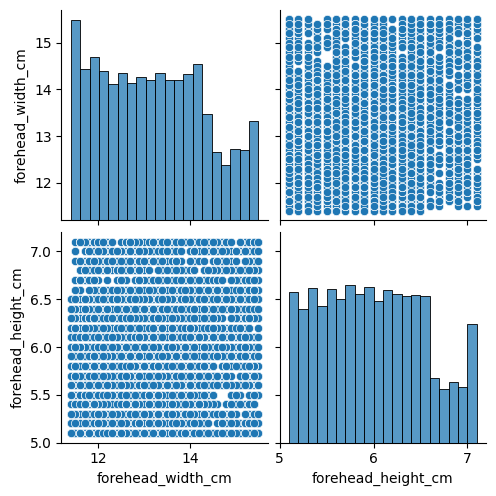

In [83]:
# to create pairplot of some data

sns.pairplot(df[['forehead_width_cm','forehead_height_cm']])
plt.show()

long_hair


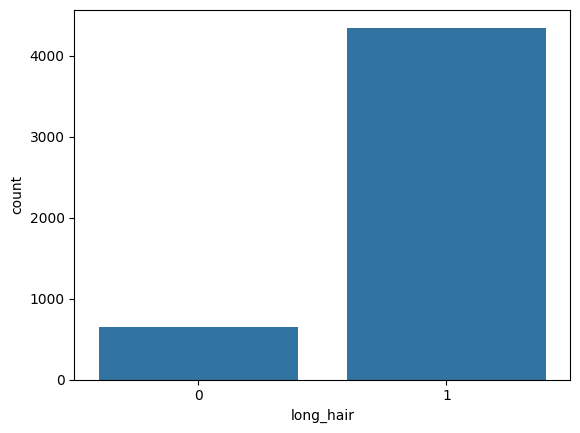

nose_wide


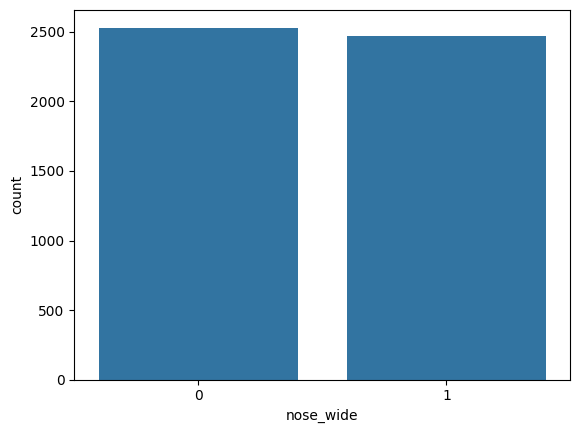

nose_long


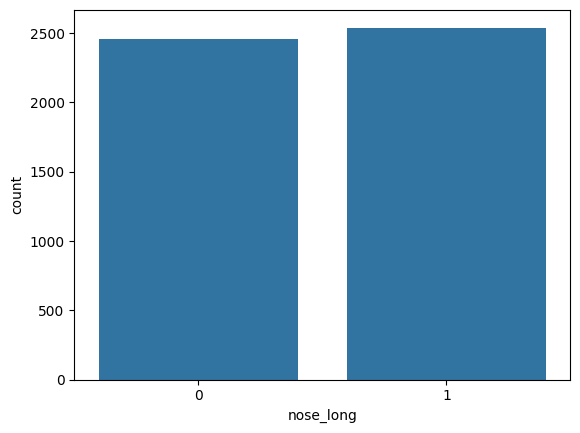

lips_thin


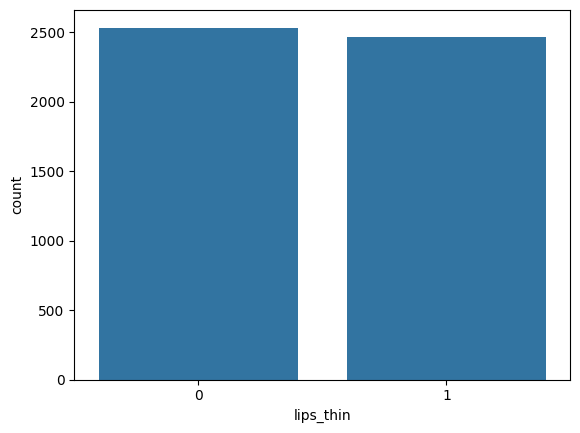

distance_nose_to_lip_long


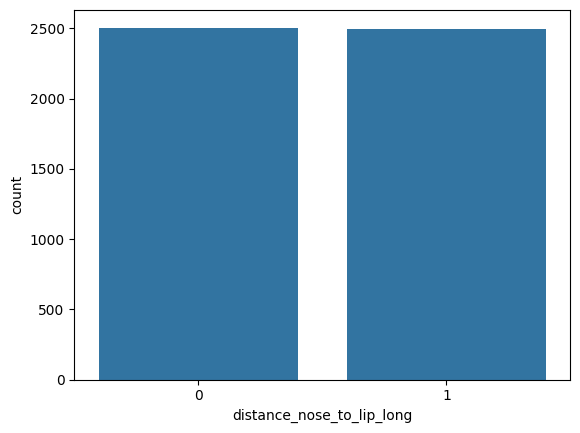

gender


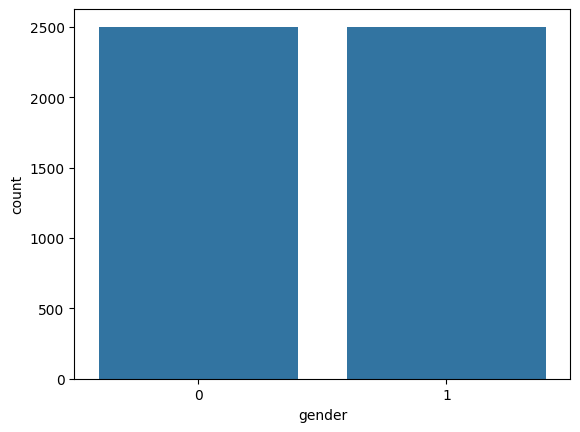

In [84]:
# to create count plot for remaining data

for i in df.drop(['forehead_width_cm','forehead_height_cm'],axis=1).columns:
    print(i)
    sns.countplot(data=df,x=i)
    plt.show()

<Axes: >

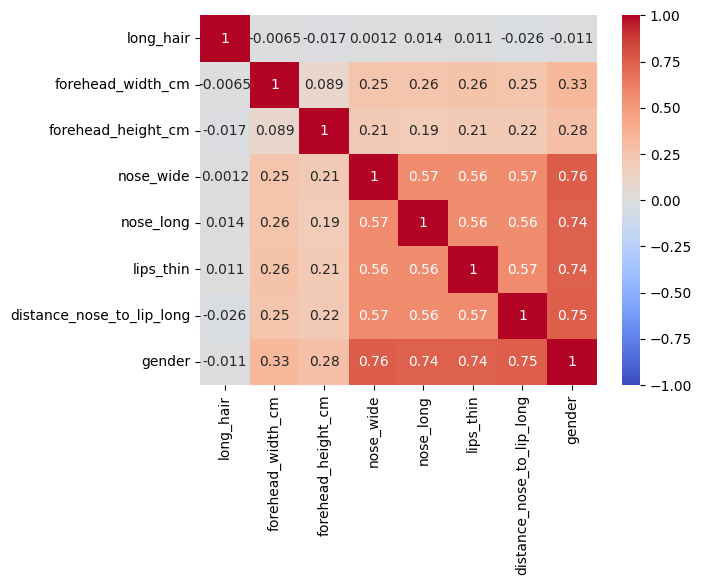

In [85]:
# to heatmap for the dataset

sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

In [86]:
# to split the dataset 

x = df.drop('gender',axis=1)
y = df['gender']

In [87]:
x

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [88]:
y

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

In [89]:
# scale the data using standard scaling (mean = 0 & std_dev = 1) 

ss = StandardScaler()
x = ss.fit_transform(x)

In [90]:
# to split these data into training and testing data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [91]:
x_train

array([[ 0.38719442,  1.73304949, -1.00941773, ...,  0.98432598,
         1.01389375,  1.00220198],
       [ 0.38719442, -1.24793291,  1.02305102, ..., -1.01592361,
        -0.98629664, -0.99780285],
       [ 0.38719442,  0.01672629, -0.45510807, ...,  0.98432598,
         1.01389375,  1.00220198],
       ...,
       [ 0.38719442, -0.88660171, -1.00941773, ..., -1.01592361,
        -0.98629664,  1.00220198],
       [ 0.38719442, -1.42859851,  2.13167034, ...,  0.98432598,
         1.01389375,  1.00220198],
       [ 0.38719442,  0.73938869,  1.76213057, ...,  0.98432598,
         1.01389375, -0.99780285]])

In [92]:
y_train

235     1
2697    0
1219    1
135     0
3613    1
       ..
4149    1
1890    1
350     0
79      1
3927    1
Name: gender, Length: 4000, dtype: int64

In [93]:
x_test

array([[-2.58268182,  0.64905589,  0.28397148, ...,  0.98432598,
         1.01389375,  1.00220198],
       [ 0.38719442, -1.15760011,  0.65351125, ...,  0.98432598,
        -0.98629664, -0.99780285],
       [ 0.38719442,  0.37805749,  0.83828114, ..., -1.01592361,
        -0.98629664, -0.99780285],
       ...,
       [ 0.38719442, -1.51893131,  0.46874136, ..., -1.01592361,
        -0.98629664, -0.99780285],
       [ 0.38719442, -0.16393931,  0.28397148, ...,  0.98432598,
         1.01389375,  1.00220198],
       [-2.58268182,  1.28138549, -0.0855683 , ...,  0.98432598,
         1.01389375,  1.00220198]])

In [94]:
y_test

294     1
1379    0
3667    0
504     1
1359    0
       ..
4526    1
2029    1
4922    0
4523    1
4522    1
Name: gender, Length: 1001, dtype: int64

In [95]:
x_train.shape

(4000, 7)

In [96]:
x_test.shape

(1001, 7)

In [97]:
len(y_train)

4000

In [98]:
len(y_test)

1001

In [99]:
# to assign the algorithm to a variable 

nv = GaussianNB()
nv


GaussianNB()

In [100]:
# to fit the training data

nv.fit(x_train,y_train)


GaussianNB()

In [101]:
# to get the prediction on train & test data

y_train_pred = nv.predict(x_train)
y_test_pred = nv.predict(x_test)

In [102]:
y_train_pred

array([1, 0, 1, ..., 0, 1, 1])

In [103]:
y_test_pred

array([1, 0, 0, ..., 0, 1, 1])

In [104]:
# to get the classification report

print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1997
           1       0.98      0.97      0.97      2003

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



In [105]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       504
           1       0.97      0.97      0.97       497

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [106]:
# to get the user input

long_hair = int(input('Is your hair long [yes==1 , no==0] : '))
forehead_width_cm = float(input('Enter your forhead width [cm]: '))
forehead_height_cm = float(input('Enter your forhead height [cm]: '))
nose_wide = int(input('Is your nose is wide [yes==1 , no==0] : '))
nose_long =  int(input('Is your nose long [yes==1 , no==0] : '))
lips_thin =  int(input('Is your lips thin [yes==1 , no==0] : '))
distance_nose_to_lip_long =  int(input('Is distance b/w nose and lip are too long [yes==1 , no==0] : '))

user_input  = np.array([long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long]).reshape(1,-1)

user_input_scaled = ss.transform(user_input)

if nv.predict(user_input_scaled) == 0:
    print('Your Gender is Female')
else:
    print('Your Gender is Male')

Is your hair long [yes==1 , no==0] :  1
Enter your forhead width [cm]:  13.5
Enter your forhead height [cm]:  6.5
Is your nose is wide [yes==1 , no==0] :  1
Is your nose long [yes==1 , no==0] :  0
Is your lips thin [yes==1 , no==0] :  1
Is distance b/w nose and lip are too long [yes==1 , no==0] :  1


Your Gender is Male


C:\Users\Muhammed Thouyib TK\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
